In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import collections
from random import choices
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.callbacks import *
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# convert to one-hot-encoding
from tensorflow.keras.utils import to_categorical

# Transfer learning model
from tensorflow.keras.applications import *

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import

In [ ]:
Categories = list(os.listdir("/content/drive/MyDrive/dataset-processed/Train"))
Categories

['Anabaena',
 'Raphidiopsis',
 'Cylindrospermopsis',
 'Microcystis',
 'Nostoc',
 'Oscillatoria',
 'Aphanizomenon',
 'Phormidium',
 'Planktothrix',
 'Dolichospermum']

In [ ]:
import os
import cv2 # Make sure you have opencv imported as you're using cv2.imread

images = {}
images_directory = {}
base_dir = "/content/drive/MyDrive/dataset-processed/Train" # Define the base directory

for dirname in os.listdir(base_dir):
    # Construct the full path to the current subdirectory
    current_subdir_path = os.path.join(base_dir, dirname)

    if os.path.isdir(current_subdir_path) and dirname in Categories: # Check if it's actually a directory and is in Categories
        imags = []
        imgs_directory = []
        # Iterate through files in the current subdirectory
        for i, filename in enumerate(os.listdir(current_subdir_path)):
            if 'jpg' in filename.lower() or 'png' in filename.lower(): # Use .lower() for case-insensitivity
                addr = os.path.join(current_subdir_path, filename) # Construct full path to the image
                image = cv2.cvtColor(cv2.imread(addr), cv2.COLOR_BGR2RGB)  # Load in BGR then convert to RGB
                if image is not None: # Check if image was loaded successfully
                    image = image / 255.0
                    imags.append(image)
                    imgs_directory.append(addr)
                else:
                    print(f"Warning: Could not read image {addr}")

        images[dirname] = imags
        images_directory[dirname] = imgs_directory
    elif os.path.isdir(current_subdir_path):
        print(f"Warning: Directory '{dirname}' found in base_dir but not in Categories. Skipping.")


# Assuming 'Categories' is already defined from your first code block
# Categories = ['Anabaena', 'Raphidiopsis', 'Cylindrospermopsis', 'Microcystis', 'Nostoc', 'Oscillatoria', 'Aphanizomenon', 'Phormidium', 'Planktothrix', 'Dolichospermum']

countofallimages = 0
for cls in Categories:
    if cls in images: # Add a check to ensure the key exists before accessing
        countofallimages += len(images[cls])
    else:
        print(f"Warning: Class '{cls}' not found in 'images' dictionary after processing. This might indicate an issue with directory names or contents.")


print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories)} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 2073
There are 10 classes
Average number of essential images for each class is = 207


In [ ]:
X = []
y = []
X_addr = []
for cls in Categories:
  for img in images[cls]:
    X.append(img)
    y.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_addr.append(img)
y = np.array(y)
X = np.array(X)
X_addr = np.array(X_addr)

In [ ]:
counter = collections.Counter(y)
counter

Counter({np.str_('Anabaena'): 268,
         np.str_('Raphidiopsis'): 5,
         np.str_('Cylindrospermopsis'): 23,
         np.str_('Microcystis'): 895,
         np.str_('Nostoc'): 237,
         np.str_('Oscillatoria'): 157,
         np.str_('Aphanizomenon'): 30,
         np.str_('Phormidium'): 224,
         np.str_('Planktothrix'): 104,
         np.str_('Dolichospermum'): 130})

In [ ]:
X_train_ind, X_val_ind, y_train, y_val = train_test_split(list(range(y.shape[0])), y, test_size=0.01,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_val_addr = X_addr[X_val_ind]
X_val = X[X_val_ind]

In [ ]:
counter = collections.Counter(y_val)
counter

Counter({np.str_('Microcystis'): 11,
         np.str_('Anabaena'): 1,
         np.str_('Phormidium'): 3,
         np.str_('Nostoc'): 4,
         np.str_('Oscillatoria'): 1,
         np.str_('Cylindrospermopsis'): 1})

In [ ]:
images = {}
images_directory = {}
base_dir = "/content/drive/MyDrive/dataset-processed/Test" # Define the base directory

for dirname in os.listdir(base_dir):
    # Construct the full path to the current subdirectory
    current_subdir_path = os.path.join(base_dir, dirname)

    if os.path.isdir(current_subdir_path) and dirname in Categories: # Check if it's actually a directory and is in Categories
        imags = []
        imgs_directory = []
        # Iterate through files in the current subdirectory
        for i, filename in enumerate(os.listdir(current_subdir_path)):
          if 'jpg' in filename.lower() or 'png' in filename.lower(): # Use .lower() for case-insensitivity
              addr = os.path.join(current_subdir_path, filename) # Construct full path to the image
              image = cv2.cvtColor(cv2.imread(addr), cv2.COLOR_BGR2RGB) # Load in BGR then convert to RGB
              if image is not None: # Check if image was loaded successfully
                  image = image/255.0
                  imags.append(image)
                  imgs_directory.append(addr)
              else:
                  print(f"Warning: Could not read image {addr}")

        images[dirname] = imags
        images_directory[dirname] = imgs_directory
    elif os.path.isdir(current_subdir_path):
        print(f"Warning: Directory '{dirname}' found in base_dir but not in Categories. Skipping.")

In [ ]:
import numpy as np

# Assuming 'Categories', 'images', and 'images_directory' are already defined and populated.

X_test = []
y_test = []
X_test_addr = []

for cls in Categories:
  if cls in images:
    for img in images[cls]:
      X_test.append(img)
      y_test.append(cls)

for cls in Categories:
  if cls in images_directory:
    for img_addr in images_directory[cls]:
      X_test_addr.append(img_addr)

y_test = np.array(y_test)
X_test = np.array(X_test)
X_test_addr = np.array(X_test_addr)

In [ ]:
counter = collections.Counter(y_test)
counter

Counter({np.str_('Anabaena'): 56,
         np.str_('Raphidiopsis'): 2,
         np.str_('Cylindrospermopsis'): 3,
         np.str_('Microcystis'): 235,
         np.str_('Nostoc'): 73,
         np.str_('Oscillatoria'): 32,
         np.str_('Aphanizomenon'): 4,
         np.str_('Phormidium'): 61,
         np.str_('Planktothrix'): 19,
         np.str_('Dolichospermum'): 33})

In [ ]:
del images
del images_directory
del X
del X_val_addr
del y

In [ ]:
def generateimage(img, y, count):
    new_X_train = []
    new_y_train = []
    i = 0
    y = np.array(y).reshape((1,))

    flow = demo_datagen.flow(img.reshape((1, img.shape[0], img.shape[1], 3)), y, batch_size=12)
    for batch, ind in flow:
        if i >= count:
            break
        new_X_train.append(batch[0])  # keep full RGB image
        new_y_train.append(ind[0])
        i += 1

    new_X_train = np.array(new_X_train)
    new_y_train = np.array(new_y_train)
    return new_X_train, new_y_train


In [ ]:
def preprocessing(X_train,y_train,downsampling=True,upsampling=True):
  new_X = []
  new_y = []
  new_X_addr = []
  counter = collections.Counter(y_train)
  for cls in Categories:
    print(cls)
    if counter[cls] > np.round(np.mean(list(counter.values()))) :
      select_prob = (np.round(np.mean(list(counter.values()))) /counter[cls]) +0.3 # 0.3 is constant
      for ind , x in enumerate(X_train):
        if y_train[ind] == cls:
            if downsampling:
                choise = choices([1,0], [select_prob,1-select_prob])
                if choise==[1]:
                    new_X.append(x)
                    new_y.append(cls)
                    new_X_addr.append(X_train_addr[ind])
            else:
                new_X.append(x)
                new_y.append(cls)
                new_X_addr.append(X_addr[ind])



    if counter[cls] < np.round(np.mean(list(counter.values()))):
      if upsampling:
        generate_number = int(np.round(np.round(np.mean(list(counter.values()))) /counter[cls]))
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            n_x,n_y = generateimage(x ,y_train[ind],generate_number)
            for xx in n_x:
                new_X.append(xx)
                new_y.append(cls)
                new_X_addr.append(X_train_addr[ind])
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])
      else:
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])


  new_X = np.array(new_X)
  new_y = np.array(new_y)
  new_X_addr = np.array(new_X_addr)
  return new_X,new_y,new_X_addr

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
new_X_train, new_y_train, new_X_addr = preprocessing(X_train,y_train,downsampling=True,upsampling=True)

Anabaena
Raphidiopsis
Cylindrospermopsis
Microcystis
Nostoc
Oscillatoria
Aphanizomenon
Phormidium
Planktothrix
Dolichospermum


In [ ]:
counter = collections.Counter(new_y_train)
counter

Counter({np.str_('Anabaena'): 267,
         np.str_('Raphidiopsis'): 210,
         np.str_('Cylindrospermopsis'): 220,
         np.str_('Microcystis'): 456,
         np.str_('Nostoc'): 233,
         np.str_('Oscillatoria'): 312,
         np.str_('Aphanizomenon'): 240,
         np.str_('Phormidium'): 221,
         np.str_('Planktothrix'): 312,
         np.str_('Dolichospermum'): 390})

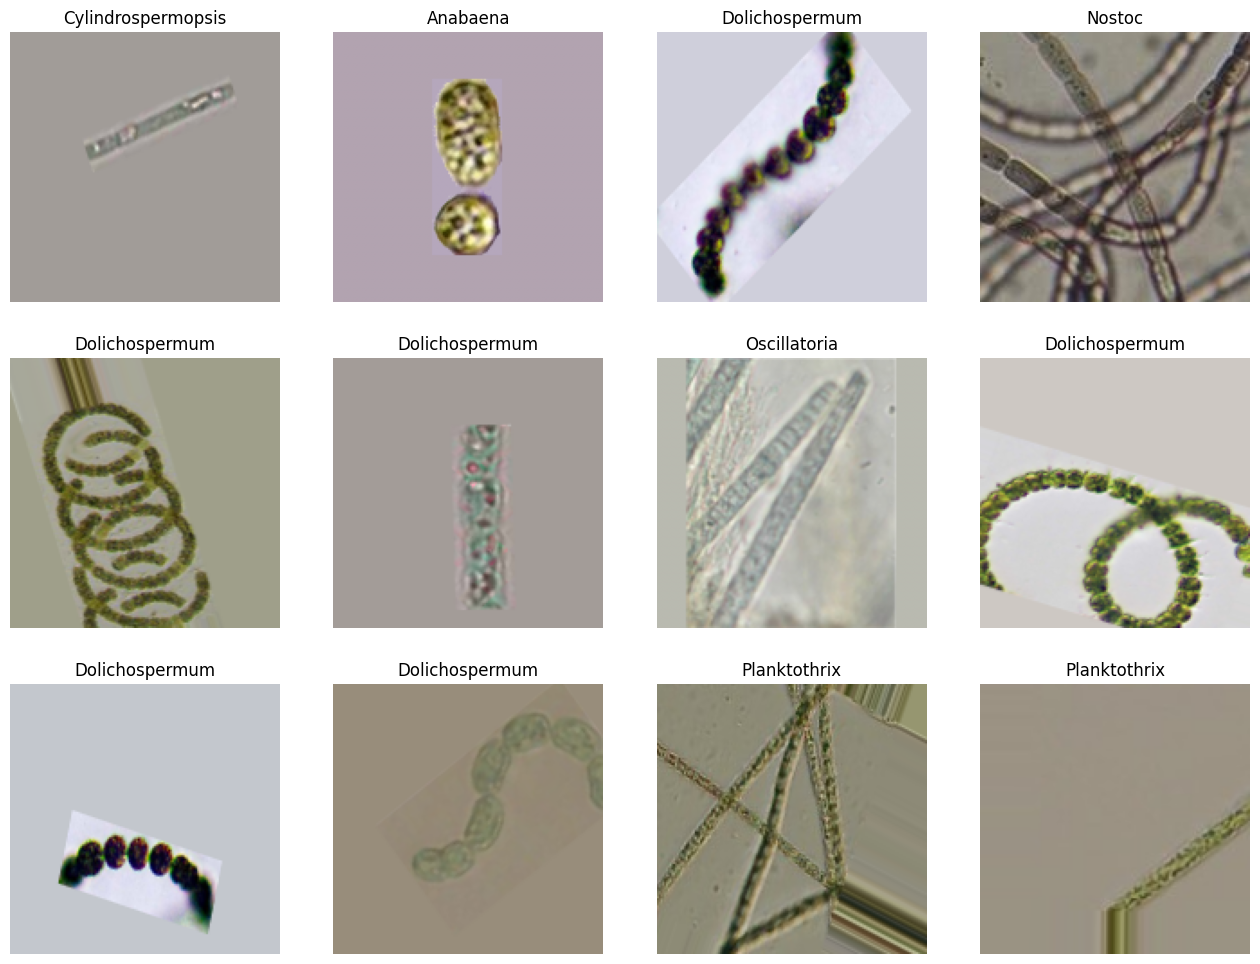

In [ ]:
plt.figure(figsize=(16,12))
for n , i in enumerate(list(np.random.randint(0,len(new_X_train),12))) :
  plt.subplot(3,4,n+1)
  plt.imshow(new_X_train[i])  # Automatically assumes RGB
  plt.axis('off')
  plt.title(new_y_train[i])

In [ ]:
counter = collections.Counter(new_y_train)
counter

Counter({np.str_('Anabaena'): 267,
         np.str_('Raphidiopsis'): 210,
         np.str_('Cylindrospermopsis'): 220,
         np.str_('Microcystis'): 456,
         np.str_('Nostoc'): 233,
         np.str_('Oscillatoria'): 312,
         np.str_('Aphanizomenon'): 240,
         np.str_('Phormidium'): 221,
         np.str_('Planktothrix'): 312,
         np.str_('Dolichospermum'): 390})

In [ ]:
del X_train
del y_train

In [ ]:
new_X_train.shape


(2861, 150, 150, 3)

In [ ]:
encoder = LabelEncoder()
encoder.fit(new_y_train)
encoded_labels_train = encoder.transform(new_y_train)
encoded_labels_test = encoder.transform(y_test)
encoded_labels_val = encoder.transform(y_val)

OneHot_labels_train = to_categorical(encoded_labels_train,num_classes=len(Categories))
OneHot_labels_test = to_categorical(encoded_labels_test,num_classes=len(Categories))
OneHot_labels_val = to_categorical(encoded_labels_val,num_classes=len(Categories))

In [ ]:
new_y_train

array(['Anabaena', 'Anabaena', 'Anabaena', ..., 'Dolichospermum',
       'Dolichospermum', 'Dolichospermum'], dtype='<U18')

In [ ]:
OneHot_labels_train.shape

(2861, 10)

In [ ]:
def labelwithoutput(output):
  listt = []
  for o in output:
    listt.append(np.argmax(o))
  return np.array(listt)

In [ ]:

mobilenet_model =MobileNet(input_shape = (150, 150, 3),include_top = False, weights = 'imagenet')
mobilenet_output = GlobalAveragePooling2D()(mobilenet_model.output)
mobilenet_output = Dense(32, activation='relu')(mobilenet_output)
mobilenet_output = Dense(16, activation='relu')(mobilenet_output)
mobilenet_output = Dense(10, activation='softmax')(mobilenet_output)
mobilenetmodel=Model(inputs=[mobilenet_model.input],outputs=mobilenet_output)
mobilenetmodel.summary()

/tmp/ipython-input-101-1697393896.py:1: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 75, 75, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 75, 75, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 75, 75, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 75, 75, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 76, 76, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 37, 37, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 37, 37, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 37, 37, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 37, 37, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,262,362 (12.44 MB)

 Trainable params: 3,240,474 (12.36 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    # Convert the TensorFlow tensor to a float
    return (lr * tf.math.exp(-0.1)).numpy()
    # Alternatively, for broader compatibility:
    # return tf.keras.backend.get_value(lr * tf.math.exp(-0.1))

callback = LearningRateScheduler(scheduler)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

filepath = 'filepath/callback.h5'

checkpoint = ModelCheckpoint(filepath,
                                monitor = 'val_loss',
                                save_best_only=True,
                                verbose = 1)

mobilenetmodel.compile(optimizer = opt,
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

history = mobilenetmodel.fit(new_X_train,
                             OneHot_labels_train,
                             validation_data = (X_val, OneHot_labels_val),
                             epochs = 40,
                             callbacks=[callback, checkpoint],
                             verbose = 1)


Epoch 1/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3424 - loss: 0.5081

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_181']
Received: inputs=Tensor(shape=(None, 150, 150, 3))




Epoch 1: val_loss improved from inf to 0.58644, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.3440 - loss: 0.5062 - val_accuracy: 0.1429 - val_loss: 0.5864 - learning_rate: 0.0010
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7989 - loss: 0.1199
Epoch 2: val_loss improved from 0.58644 to 0.34210, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.7992 - loss: 0.1197 - val_accuracy: 0.5238 - val_loss: 0.3421 - learning_rate: 0.0010
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8903 - loss: 0.0724
Epoch 3: val_loss improved from 0.34210 to 0.22384, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.8902 - loss: 0.0724 - val_accuracy: 0.7143 - val_loss: 0.2238 - learning_rate: 0.0010
Epoch 4/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9067 - loss: 0.0635
Epoch 4: val_loss did not improve from 0.22384
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9067 - loss: 0.0634 - val_accuracy: 0.7143 - val_loss: 0.2900 - learning_rate: 0.0010
Epoch 5/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9202 - loss: 0.0519
Epoch 5: val_loss improved from 0.22384 to 0.13112, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9202 - loss: 0.0519 - val_accuracy: 0.7619 - val_loss: 0.1311 - learning_rate: 0.0010
Epoch 6/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9353 - loss: 0.0455
Epoch 6: val_loss improved from 0.13112 to 0.03155, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9355 - loss: 0.0454 - val_accuracy: 0.9048 - val_loss: 0.0316 - learning_rate: 9.0484e-04
Epoch 7/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9576 - loss: 0.0261
Epoch 7: val_loss did not improve from 0.03155
90/90 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9576 - loss: 0.0261 - val_accuracy: 0.9524 - val_loss: 0.0347 - learning_rate: 8.1873e-04
Epoch 8/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9673 - loss: 0.0222
Epoch 8: val_loss did not improve from 0.03155
90/90 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9673 - loss: 0.0223 - val_accuracy: 0.9524 - val_loss: 0.0394 - learning_rate: 7.4082e-04
Epoch 9/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9714 - loss: 0.0224
Epoch 9: val_loss did not improve from 0.03155
90/90 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9715 - loss: 0.0224 - val_accuracy: 0.8571 - val_loss: 0.0838 - learning_rate: 6.7032e-04
Epoch 10/40
90/90 ━━━━━━━━━━━━━━━━

90/90 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9976 - loss: 0.0037 - val_accuracy: 0.9524 - val_loss: 0.0244 - learning_rate: 4.9659e-04
Epoch 13/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9976 - loss: 0.0031
Epoch 13: val_loss did not improve from 0.02438
90/90 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9975 - loss: 0.0031 - val_accuracy: 0.9524 - val_loss: 0.0302 - learning_rate: 4.4933e-04
Epoch 14/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9955 - loss: 0.0036
Epoch 14: val_loss improved from 0.02438 to 0.00830, saving model to filepath/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9955 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0083 - learning_rate: 4.0657e-04
Epoch 15/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9967 - loss: 0.0027
Epoch 15: val_loss did not improve from 0.00830
90/90 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9967 - loss: 0.0027 - val_accuracy: 0.9524 - val_loss: 0.0901 - learning_rate: 3.6788e-04
Epoch 16/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9992 - loss: 0.0014
Epoch 16: val_loss did not improve from 0.00830
90/90 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9992 - loss: 0.0014 - val_accuracy: 0.9524 - val_loss: 0.0623 - learning_rate: 3.3287e-04
Epoch 17/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9985 - loss: 0.0019
Epoch 17: val_loss did not improve from 0.00830
90/90 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9985 - loss: 0.0019 - val_accuracy: 0.9524 - val_loss: 0.0551 - learning_rate: 3.0119e-04
Epoch 18/40
90/90 ━━━━━━━━━━

In [ ]:
mobilenetmodel.load_weights('/content/drive/MyDrive/dataset-processed/mobilenet.h5')

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step - accuracy: 0.9011 - loss: 0.0778
Test Loss: 0.09838941693305969
Test Accuracy : 0.8667953610420227


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_181']
Received: inputs=Tensor(shape=(32, 150, 150, 3))



17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 579ms/step
                    precision    recall  f1-score   support

          Anabaena     0.8305    0.8750    0.8522        56
     Aphanizomenon     0.5000    0.2500    0.3333         4
Cylindrospermopsis     0.5000    0.6667    0.5714         3
    Dolichospermum     0.7838    0.8788    0.8286        33
       Microcystis     0.9955    0.9319    0.9626       235
            Nostoc     0.9710    0.9178    0.9437        73
      Oscillatoria     0.5000    0.9375    0.6522        32
        Phormidium     0.9318    0.6721    0.7810        61
      Planktothrix     0.4762    0.5263    0.5000        19
      Raphidiopsis     0.5000    0.5000    0.5000         2

          accuracy                         0.8668       518
         macro avg     0.6989    0.7156    0.6925       518
      weighted avg     0.8949    0.8668    0.8730       518



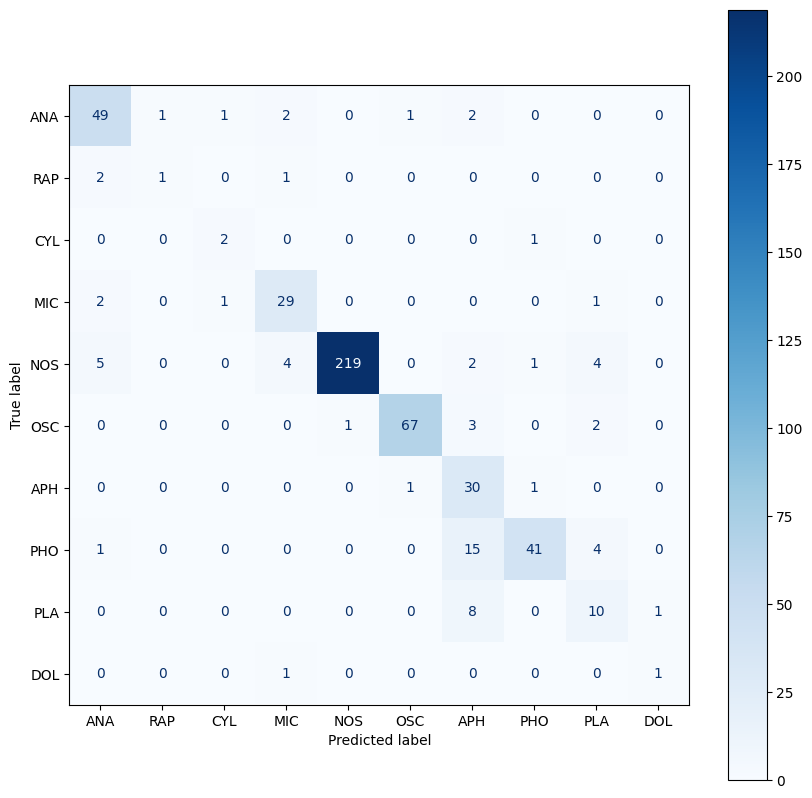

In [ ]:
# Evaluate
test_Loss, test_Acc = mobilenetmodel.evaluate(X_test, OneHot_labels_test)
print('Test Loss:', test_Loss)
print('Test Accuracy :', test_Acc)

# Predict
Y_pred = mobilenetmodel.predict(X_test)
Y_pred = encoder.inverse_transform(labelwithoutput(Y_pred))

# Classification Report
print(classification_report(y_test, Y_pred, digits=4))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred), display_labels=[cl[:3].upper() for cl in Categories])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues')
plt.show()


In [ ]:
# Add data
epochs = [f'{str(i)}' for i in range(1,41)]
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']


import plotly.graph_objects as go

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=epochs, y=train_accuracy, name='Train Accuracy',
                         line=dict(color='firebrick', width=4)))

fig.add_trace(go.Scatter(x=epochs, y=val_loss, name='Val Loss',
                         line=dict(color='royalblue', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=epochs, y=train_loss, name='Train Loss',
                         line=dict(color='firebrick', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, name='Val Accuracy',
                         line=dict(color='royalblue', width=4)))

# Edit the layout
fig.update_layout(title='Epoch/Loss Plot',
                  xaxis_title='Epochs',
                  yaxis_title='Loss / Accuracy (%)',
                  legend_title='Legend',
                  template='plotly_white')

fig.show()


In [ ]:
new_layer = Flatten()(mobilenetmodel.layers[-4].output)
intermediate_layer_model = Model(inputs=mobilenetmodel.input,
                                       outputs=new_layer)
intermediate_output_train = intermediate_layer_model.predict(new_X_train)
intermediate_output_test = intermediate_layer_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_181']
Received: inputs=Tensor(shape=(32, 150, 150, 3))



89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_181']
Received: inputs=Tensor(shape=(None, 150, 150, 3))



90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 617ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 518ms/step


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(intermediate_output_train)
X_new = pca.transform(intermediate_output_train)
X_test_new = pca.transform(intermediate_output_test)

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective="multi:softmax", num_class=len(Categories)) # Changed objective and added num_class
xgb_cl.fit(X_new, encoded_labels_train) # Use encoded labels for training
Y_pred = xgb_cl.predict(X_test_new)
print(accuracy_score(encoded_labels_test, Y_pred)) # Use encoded labels for accuracy calculation
print(classification_report(encoded_labels_test, Y_pred,digits=4)) # Use encoded labels for classification report

0.9054054054054054
              precision    recall  f1-score   support

           0     0.9200    0.8214    0.8679        56
           1     0.1111    0.2500    0.1538         4
           2     0.2857    0.6667    0.4000         3
           3     0.9091    0.9091    0.9091        33
           4     0.9748    0.9872    0.9810       235
           5     0.9710    0.9178    0.9437        73
           6     0.7778    0.8750    0.8235        32
           7     0.9375    0.7377    0.8257        61
           8     0.6429    0.9474    0.7660        19
           9     0.0000    0.0000    0.0000         2

    accuracy                         0.9054       518
   macro avg     0.6530    0.7112    0.6671       518
weighted avg     0.9210    0.9054    0.9095       518



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9111969111969112
                    precision    recall  f1-score   support

          Anabaena     0.9216    0.8393    0.8785        56
     Aphanizomenon     0.2222    0.5000    0.3077         4
Cylindrospermopsis     0.2857    0.6667    0.4000         3
    Dolichospermum     0.8378    0.9394    0.8857        33
       Microcystis     0.9872    0.9872    0.9872       235
            Nostoc     0.9718    0.9452    0.9583        73
      Oscillatoria     0.7632    0.9062    0.8286        32
        Phormidium     0.9767    0.6885    0.8077        61
      Planktothrix     0.6667    0.9474    0.7826        19
      Raphidiopsis     0.0000    0.0000    0.0000         2

          accuracy                         0.9112       518
         macro avg     0.6633    0.7420    0.6836       518
      weighted avg     0.9278    0.9112    0.9140       518



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, new_y_train)
Y_pred = neigh.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9054054054054054
                    precision    recall  f1-score   support

          Anabaena     0.9787    0.8214    0.8932        56
     Aphanizomenon     0.2308    0.7500    0.3529         4
Cylindrospermopsis     0.3333    0.6667    0.4444         3
    Dolichospermum     0.7692    0.9091    0.8333        33
       Microcystis     0.9871    0.9787    0.9829       235
            Nostoc     0.9600    0.9863    0.9730        73
      Oscillatoria     0.7632    0.9062    0.8286        32
        Phormidium     0.9756    0.6557    0.7843        61
      Planktothrix     0.6538    0.8947    0.7556        19
      Raphidiopsis     0.0000    0.0000    0.0000         2

          accuracy                         0.9054       518
         macro avg     0.6652    0.7569    0.6848       518
      weighted avg     0.9277    0.9054    0.9092       518



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC # Moved import to the top

# Gaussian Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_new, new_y_train)
Y_pred_nb = clf_nb.predict(X_test_new)
print("Gaussian Naive Bayes Results:")
print(accuracy_score(y_test, Y_pred_nb))
print(classification_report(y_test, Y_pred_nb,digits=4))

# Support Vector Machine
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_new, new_y_train)
Y_pred_svm = clf_svm.predict(X_test_new)
print("\nSupport Vector Machine Results:")
print(accuracy_score(y_test, Y_pred_svm))
print(classification_report(y_test, Y_pred_svm,digits=4))

Gaussian Naive Bayes Results:
0.8976833976833977
                    precision    recall  f1-score   support

          Anabaena     0.9583    0.8214    0.8846        56
     Aphanizomenon     0.2000    0.5000    0.2857         4
Cylindrospermopsis     0.3333    0.6667    0.4444         3
    Dolichospermum     0.7381    0.9394    0.8267        33
       Microcystis     0.9871    0.9745    0.9807       235
            Nostoc     0.9714    0.9315    0.9510        73
      Oscillatoria     0.7778    0.8750    0.8235        32
        Phormidium     0.9762    0.6721    0.7961        61
      Planktothrix     0.5625    0.9474    0.7059        19
      Raphidiopsis     0.0000    0.0000    0.0000         2

          accuracy                         0.8977       518
         macro avg     0.6505    0.7328    0.6699       518
      weighted avg     0.9224    0.8977    0.9025       518



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Support Vector Machine Results:
0.9073359073359073
                    precision    recall  f1-score   support

          Anabaena     0.9216    0.8393    0.8785        56
     Aphanizomenon     0.1667    0.5000    0.2500         4
Cylindrospermopsis     0.3333    0.6667    0.4444         3
    Dolichospermum     0.8333    0.9091    0.8696        33
       Microcystis     0.9871    0.9787    0.9829       235
            Nostoc     0.9722    0.9589    0.9655        73
      Oscillatoria     0.7838    0.9062    0.8406        32
        Phormidium     0.9767    0.6885    0.8077        61
      Planktothrix     0.6429    0.9474    0.7660        19
      Raphidiopsis     0.0000    0.0000    0.0000         2

          accuracy                         0.9073       518
         macro avg     0.6618    0.7395    0.6805       518
      weighted avg     0.9278    0.9073    0.9120       518



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0, max_iter=300).fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9092664092664092
                    precision    recall  f1-score   support

          Anabaena     0.9783    0.8036    0.8824        56
     Aphanizomenon     0.2500    0.7500    0.3750         4
Cylindrospermopsis     0.4000    0.6667    0.5000         3
    Dolichospermum     0.8378    0.9394    0.8857        33
       Microcystis     0.9789    0.9872    0.9831       235
            Nostoc     0.9722    0.9589    0.9655        73
      Oscillatoria     0.7250    0.9062    0.8056        32
        Phormidium     0.9524    0.6557    0.7767        61
      Planktothrix     0.6923    0.9474    0.8000        19
      Raphidiopsis     1.0000    0.5000    0.6667         2

          accuracy                         0.9093       518
         macro avg     0.7787    0.8115    0.7641       518
      weighted avg     0.9307    0.9093    0.9128       518

